#### Group Members
- Selva Subramaniam (ss170@illinois.edu)

  (https://www.linkedin.com/in/selvamani-subramaniam)
- Prannoy Kathiresan (prannoy2@illinois.edu)

  (https://www.linkedin.com/in/prannoy-kathiresan-071200145/)
- Vishal Dayalan (vishald2@illinois.edu)
  
  (https://www.linkedin.com/in/vishal-dayalan)
- Deepanshu Malhotra (dm56@illinois.edu)
  
  (https://in.linkedin.com/in/deepanshumalhotra20042)


# **Data Exploration of NYC Citi-bike rentals**
Different forms of graphs are used to visualize the NYC Citi-bike rental data. Before beginnning the visualization, let's load the data first and manipulate them according to our graphs' needs

In [ ]:
# Import the necessary libraries
from google.colab import drive
import os
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import MinMaxScaler



In [ ]:
# Load the data
drive.mount('/content/drive')
path = f'/content/drive/My Drive/IE434_Deep_Learning/Data_extraction/merged_pkl_data_file(worked2).pkl'
df = pd.read_pickle(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Convert trip duration to seconds and minutes since the trip duration is in timedelta64 format
df['tripduration_seconds'] = df['tripduration'].dt.total_seconds()
df['tripminutes'] = df['tripduration_seconds']/60

# Define a custom rounding function to have tripminutes in integers
def custom_round(x):
    if x >= 0.5:
        return np.ceil(x)  # Round up to the next integer
    else:
        return np.floor(x)  # Round down to the current integer

df['tripminutes'] = df['tripminutes'].apply(custom_round)

In [ ]:
# Extract relevant datetime features
df['start hour']=df['starttime'].dt.hour.astype('category')
df['start day']=df['starttime'].dt.day.astype('category')
df['weekday']=df['starttime'].dt.weekday.astype('category')
df['weekend'] = [1 if d >= 5 else 0 for d in df['weekday']]  # 1 for weekend, 0 for weekdays

In [ ]:
print("Total number of trips : ", df['tripminutes'].count())

Total number of trips :  1521600


# **Data Visualization**
### **Trip duration frequency**
To get the overall picture, let's first visualize frequency of every trip's duration.

*   We will plot the trip duration in x-axis and its correspodning count in y-axis
*   Observing the graph, we can see duration of less than 10 minutes account for the maximum number of trips made between any stations. For instance, there is approximately 100,000 trips that are just for 10-minutes.
*   We can see from the plot that:
    * 6-minute trip is the most frequent (Frequency ~140,000)
    * 7-minute trip is the second most frequent (Frequency ~ 139,900)
    * 8-minute trip is the third most frequent (Frequency ~127,000)
* **Inference** : From only this graph, Short-trips are preferred over long-trips which means that start location and end locations are not very far apart.










In [ ]:
df.head()

,rideable_type,starttime,stoptime,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,tripduration_seconds,tripminutes,start hour,start day,weekday,weekend
0,classic_bike,2022-03-18 15:38:17,2022-03-18 15:45:34,Mama Johnson Field - 4 St & Jackson St,HB404,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.743140,-74.040041,40.736982,-74.027781,Customer,0 days 00:07:17,437.0,8.0,15,18,4,0
1,electric_bike,2022-03-04 16:44:48,2022-03-04 16:50:45,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,0 days 00:05:57,357.0,6.0,16,4,4,0
2,electric_bike,2022-03-13 17:44:32,2022-03-13 17:54:44,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,0 days 00:10:12,612.0,11.0,17,13,6,1
3,classic_bike,2022-03-13 15:33:47,2022-03-13 15:41:22,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,0 days 00:07:35,455.0,8.0,15,13,6,1
4,classic_bike,2022-03-11 12:21:18,2022-03-11 12:33:24,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,0 days 00:12:06,726.0,13.0,12,11,4,0


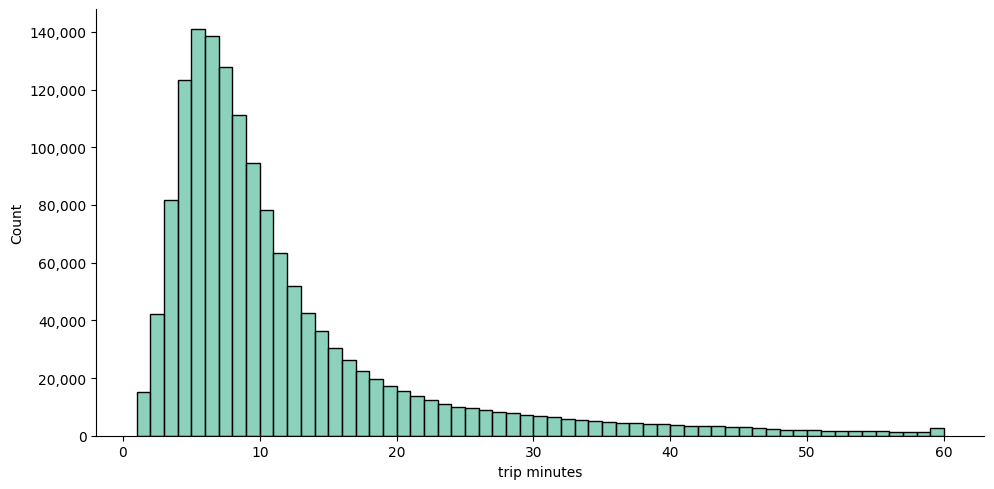

In [ ]:
sns.displot(data=df,x="tripminutes", bins=range(1,61), aspect=10/5);
plt.xlabel("trip minutes")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))


### **Start-time frequency**

Similarly, we will visualize the frequency of trip start hours.
* Bar graph is used for this purpose
* We can observe that more than 140,000 trips start between 1800 - 1900 hrs (We have manipulated the data in such a way that the bar graph at 1800 hrs means all the trips made between 1800 - 1859 hrs, technically)
* Also, an appreciable amount of trips (~ 90,000) are made during the office start hour of 8 am.




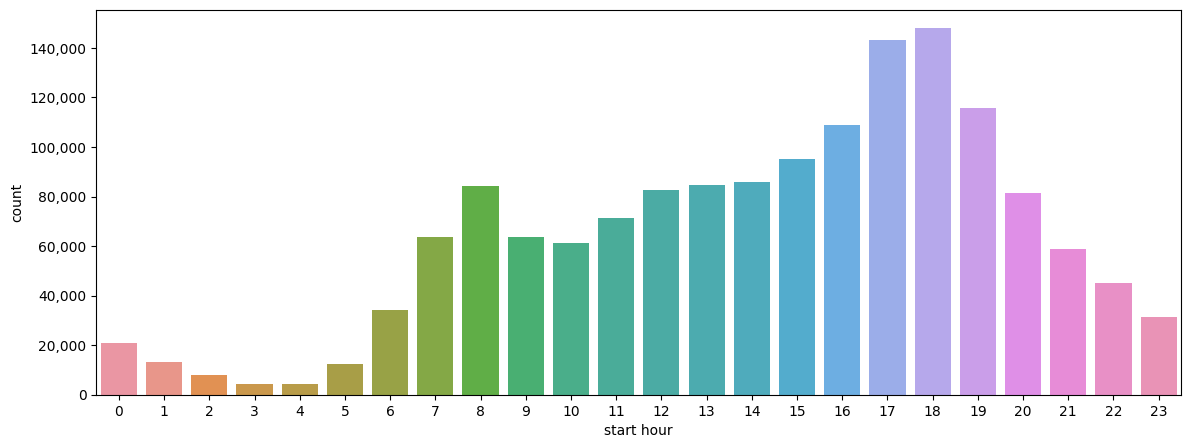

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x="start hour" );
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

## **Day-wise frequency**
In a similar fashion, we will visualize the frequency of trips for each day.
* Bar chart is used for this purpose
* We can see that, 15th of each month accounts for the maximum number of trips (more than 40,000 )
* We can also see that, weekdays contribute for the maximum use of Citi-bikes than weekends. (Few cases may differ but this paints that big picture). Possible reasons are:
  * It can be that weekdays are usually the busiest and people may tend to relax (by staying at home) during weekends.
  * Contrary to that, people may want to stroll around during weekends. That's why if you have a closer look at some of the bars, weekends are busier than weekdays)  



In [ ]:
df.head()

,rideable_type,starttime,stoptime,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,tripduration_seconds,tripminutes,start hour,start day,weekday,weekend
0,classic_bike,2022-03-18 15:38:17,2022-03-18 15:45:34,Mama Johnson Field - 4 St & Jackson St,HB404,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.743140,-74.040041,40.736982,-74.027781,Customer,0 days 00:07:17,437.0,8.0,15,18,4,0
1,electric_bike,2022-03-04 16:44:48,2022-03-04 16:50:45,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,0 days 00:05:57,357.0,6.0,16,4,4,0
2,electric_bike,2022-03-13 17:44:32,2022-03-13 17:54:44,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,0 days 00:10:12,612.0,11.0,17,13,6,1
3,classic_bike,2022-03-13 15:33:47,2022-03-13 15:41:22,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,0 days 00:07:35,455.0,8.0,15,13,6,1
4,classic_bike,2022-03-11 12:21:18,2022-03-11 12:33:24,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,0 days 00:12:06,726.0,13.0,12,11,4,0


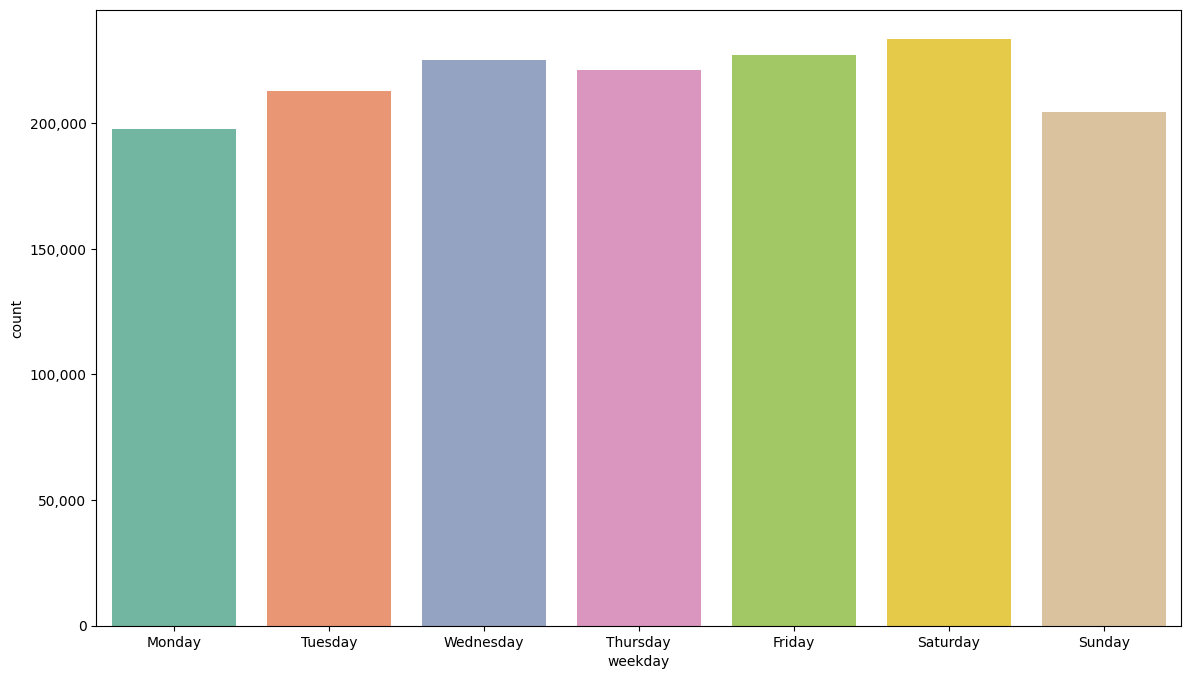

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_palette("Set2")
df['weekday'] = df['starttime'].dt.day_name()
sns.countplot(data=df, x="weekday",order=['Monday', 'Tuesday', 'Wednesday',
                                          'Thursday', 'Friday', 'Saturday',
                                          'Sunday'] ,dodge=False)
# plt.legend(title="Day", loc="upper right")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()


In [ ]:
df['weekday'].head()

0    <bound method PandasDelegate._add_delegate_acc...
1    <bound method PandasDelegate._add_delegate_acc...
2    <bound method PandasDelegate._add_delegate_acc...
3    <bound method PandasDelegate._add_delegate_acc...
4    <bound method PandasDelegate._add_delegate_acc...
Name: weekday, dtype: object

### **Start-station frequency (Top 20)**
Likewise, we will visualize the start-station frequency, but for the top 20 stations.
* Horizontal bar chart is used for this purpose
* It is a simple graph that is plotted in descending order of the frequency of the top 20 start-stations used.
* We can observe that the topmost frequently accessed start station is "Grove St PATH".
* We should concentrate on these top 20 start-stations to place the Citi-bikes. This will help us in planning the placement-distribution of bikes.


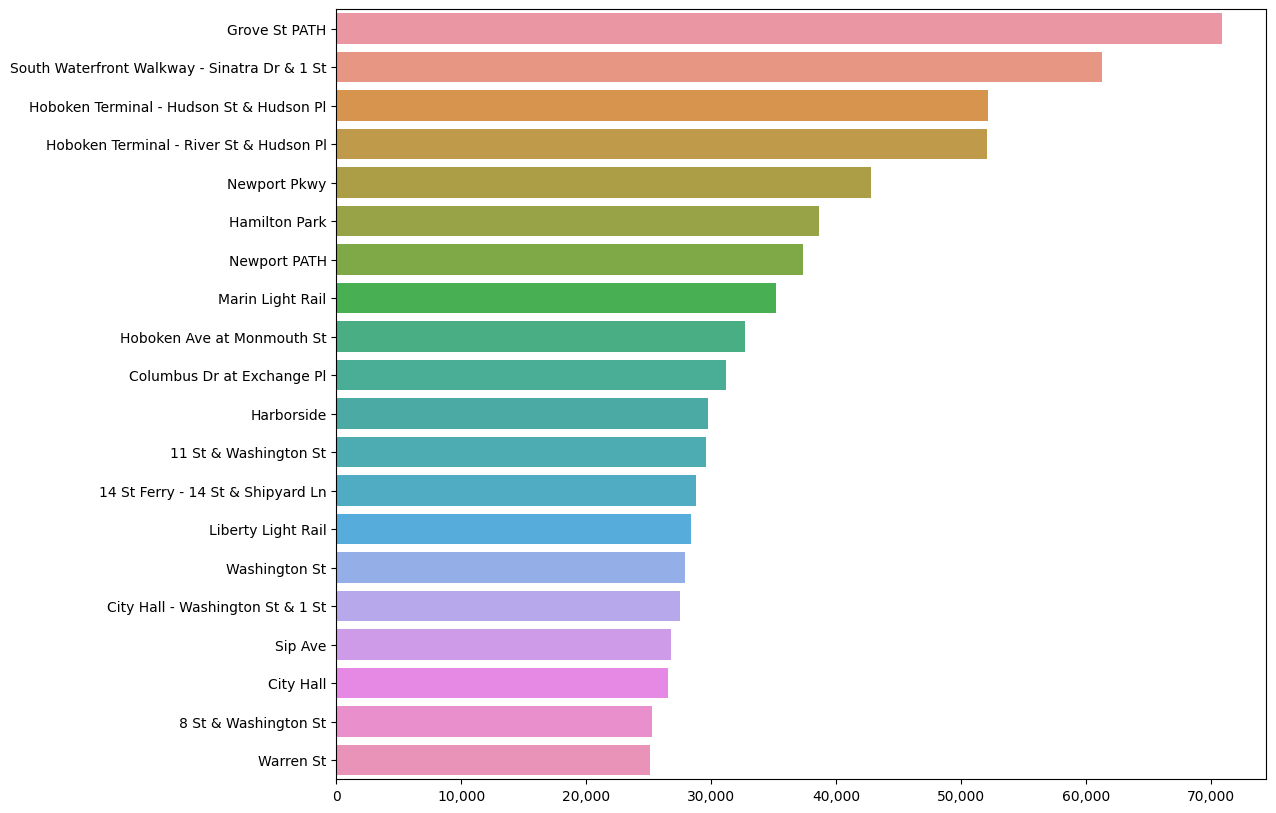

In [ ]:
startstation = df['start_station_name'].value_counts()[:20]
plt.figure(figsize=(12,10))
sns.barplot(x=startstation.values , y=list(startstation.index), orient="h");
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

### **End-station frequency (Top 20)**
Likewise, we will visualize the end-station frequency, but for the top 20 stations.
* Horizontal bar chart is used for this purpose
* It is a simple graph that is plotted in descending order of the frequency of the top 20 dropoff-stations used.
* We can observe that the topmost frequent dropoff station is also "Grove St PATH".
* We should concentrate on these top 20 end-stations which will help us in planning the placement-distribution of bikes.


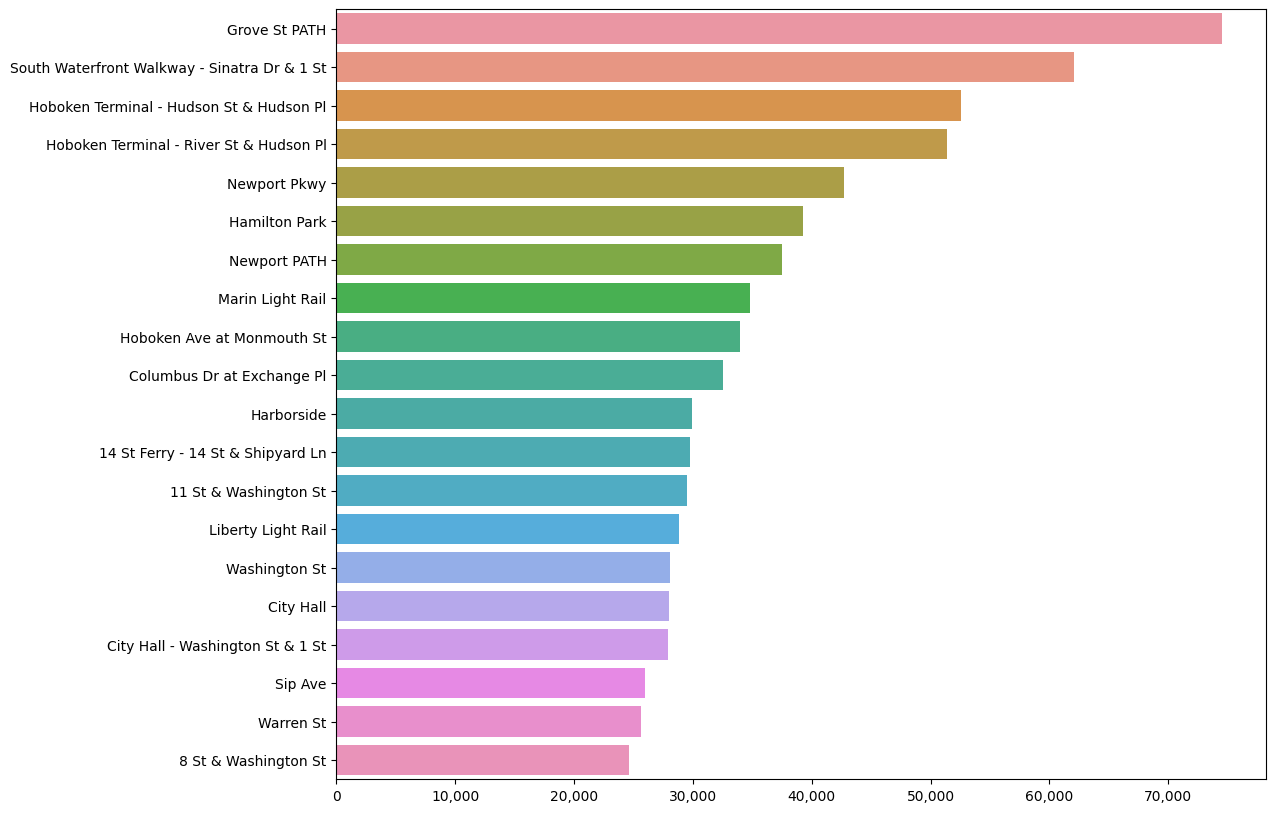

In [ ]:
endstation = df['end_station_name'].value_counts()[:20]
plt.figure(figsize=(12,10))
sns.barplot( x=endstation.values , y=list(endstation.index), orient="h")
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))


Pie chart of top 20 end-stations


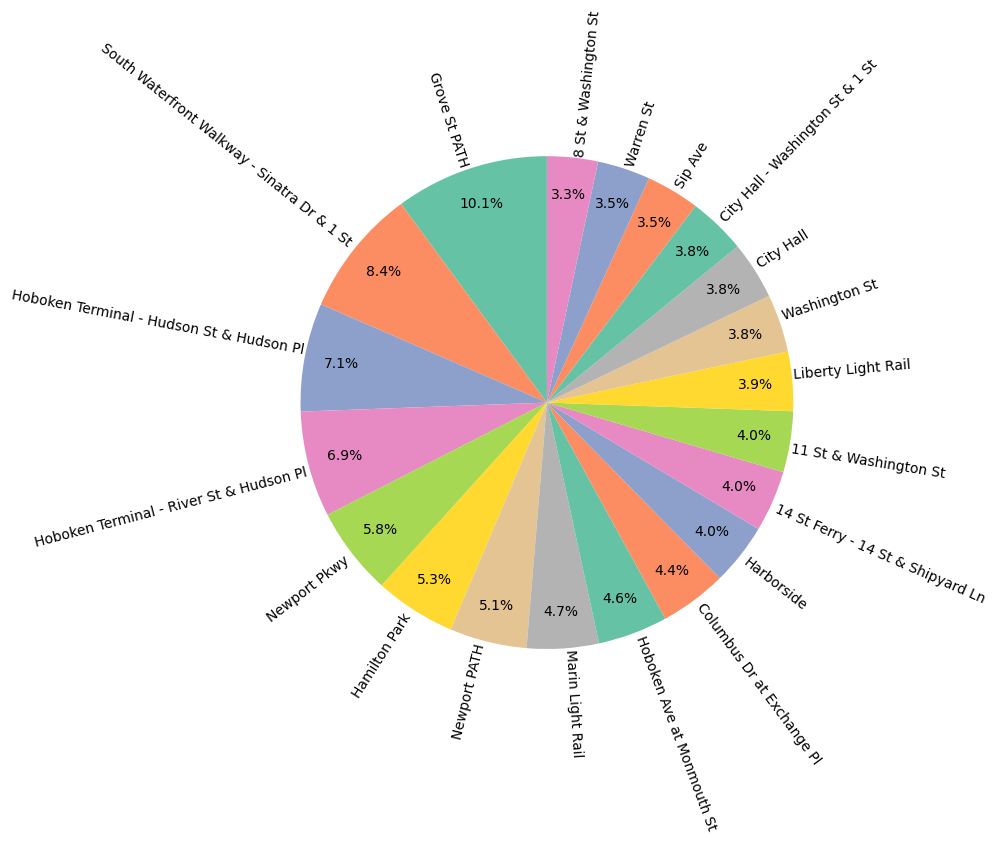

In [ ]:
fig = plt.figure(figsize=(8,8))
A = plt.pie(df['end_station_name'].value_counts()[:20],
            labels=df['end_station_name'].value_counts().index[:20],
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1,
            pctdistance=0.85,
            rotatelabels=90
            )

print("Pie chart of top 20 end-stations")
plt.show()

### Inference for the Jersey City Map

- The figure below shows a map of Jersey City with the end location of rides.
- The end location is marked with red circles and the size of the cirlce represents the relative count of observations.
- We show top 20 sites where the rides were ended in the map.
- It can be observed on the map that Grove St PATH is the most popular location for ending the rides.

In [ ]:

endstation = df['end_station_name'].value_counts()[:20]
endstation.head()

lat_point = []
long_point = []

for i in endstation.index:
  temp_df = df[df["end_station_name"]==i]
  lat_point.append(temp_df.iloc[0]["end_lat"])
  long_point.append(temp_df.iloc[0]["end_lng"])

new_data = {
    'City': endstation.index,
    'Count': endstation.values,
    'Latitude': lat_point,
    'Longitude': long_point
}

new_endstation = pd.DataFrame(new_data)
new_endstation.head()

,City,Count,Latitude,Longitude
0,Grove St PATH,74527,40.719586,-74.043117
1,South Waterfront Walkway - Sinatra Dr & 1 St,62099,40.736982,-74.027781
2,Hoboken Terminal - Hudson St & Hudson Pl,52590,40.735938,-74.030305
3,Hoboken Terminal - River St & Hudson Pl,51364,40.736068,-74.029127
4,Newport Pkwy,42750,40.728745,-74.032108


In [ ]:
scaler = MinMaxScaler()
new_endstation["Count"] = (new_endstation["Count"] - min(new_endstation["Count"]))/( max(new_endstation["Count"])-min(new_endstation["Count"]) )
new_endstation["Count"]*=500

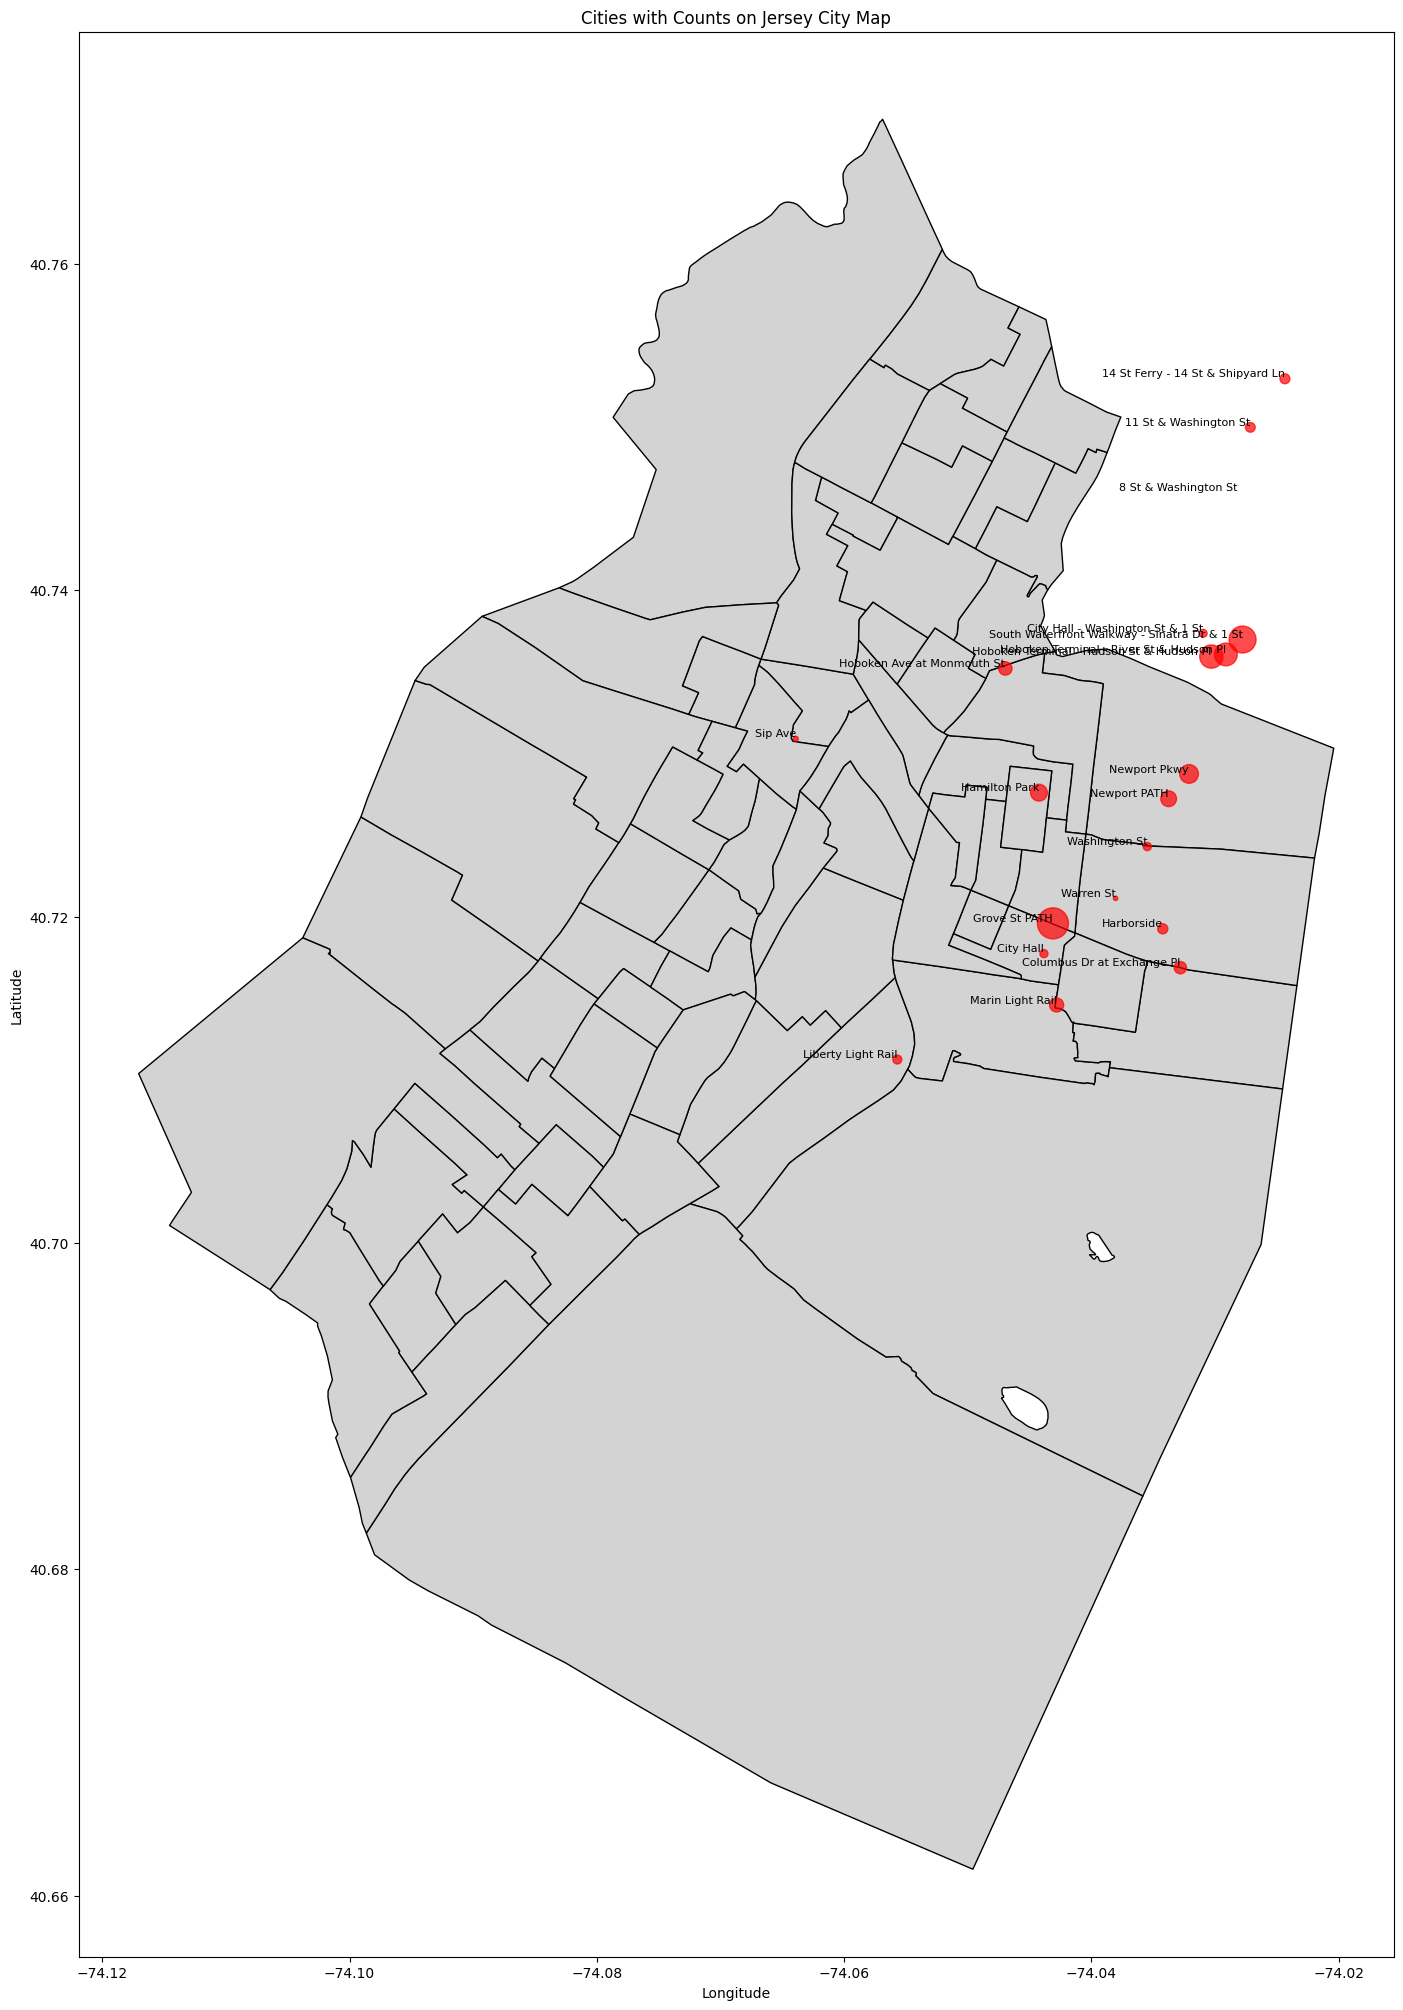

In [ ]:
# Create a GeoDataFrame with points and counts
geometry = [Point(lon, lat) for lon, lat in zip(new_endstation['Longitude'], new_endstation['Latitude'])]
gdf = gpd.GeoDataFrame(new_endstation, geometry=geometry, crs='EPSG:4326')

# Load New Jersey state boundaries (replace with your shapefile or GeoJSON file)
nj_shapefile = "/content/drive/My Drive/IE434_Deep_Learning22/Data_extraction/jersey_city_censustract_geojson.geojson"
nj_map = gpd.read_file(nj_shapefile)

# Increase the scale of the plot by adjusting figsize
fig, ax = plt.subplots(figsize=(40, 25))

# Plot New Jersey state map
# ax = nj_map.plot(color='lightgrey', edgecolor='black', figsize=(10, 10))
nj_map.plot(ax=ax, color='lightgrey', edgecolor='black')


# Plot cities with counts on top of the map
scatter = gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['Count'], alpha=0.7, legend=True)

# Add city names as annotations
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['City']):
    ax.text(x, y, label, fontsize=8, ha='right', va='bottom')

# # Set legend labels
# legend_labels = [f"{city}: {count}" for city, count in zip(gdf['City'], gdf['Count'])]
# scatter.legend(legend_labels, title='City Counts', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('Cities with Counts on Jersey City Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()